In [16]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt



In [14]:
def split_output(output):
    cnt, prey, predator, berry = [], [], [], []

    for line in output.strip().split('\n'):
        a, b, c, d = map(int, line.split())
        cnt.append(a)
        prey.append(b)
        predator.append(c)
        berry.append(d)

    cnt = np.array(cnt)
    prey = np.array(prey)
    predator = np.array(predator)
    berry = np.array(berry)

    return cnt, prey, predator, berry

In [35]:
#Make sure Callable.java is compiled
def simulate(prey = 10, predator = 10, berry = 10):
    path_to_out = '..\..\..' #Change it according to your IDE settings
    command = f'java -cp {path_to_out}\out\production\L48 PyInterface.Callable {prey} {predator} {berry}'

    process = subprocess.Popen(command, stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()
    return split_output(stdout.decode())

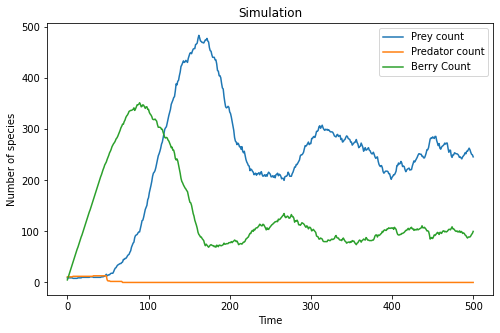

In [37]:
cnt, prey, predator, berry = simulate(10, 10, 0)

plt.figure(figsize=(8, 5))
plt.plot(cnt, prey, label='Prey count')
plt.plot(cnt, predator, label='Predator count')
plt.plot(cnt, berry, label='Berry Count')

plt.title('Simulation')
plt.xlabel('Time')
plt.ylabel('Number of species')

plt.legend()

plt.show()
